In [1]:
import sys
import numpy as np
import pandas as pd
import random

sys.path.append('/home/olya/TUM/DESMOND/DESMOND2/')
from run_unpast import run

from utils.method import read_bic_table, make_consensus_biclusters2, write_bic_table, zscore

### Input and output

In [2]:
exprs_file = "test_data_TCGA200/TCGA_200.exprs_z.tsv" # input .tsv file; features in rows, samples in columns
exprs = pd.read_csv(exprs_file,sep = "\t",index_col=0)
basename = 'TCGA200' # output prefix
out_dir = "tmp_results/" # output folder

### Running UnPaSt five times

* biclusters from individual runs:

\<basename>.seed=\<seed>.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


In [3]:
n_runs = 5
seeds = []
cseed = 0
random.seed(cseed)
for i in range(n_runs):
    seeds.append(random.randint(0,1000000))
print("generate ",n_runs," seeds",seeds)

generate  5  seeds [885440, 403958, 794772, 933488, 441001]


In [4]:
biclusters = []
for seed in seeds:
    # find and save biclusters
    results = run(exprs_file, basename,
                          out_dir=out_dir,
                          save=True, load=True,
                          # optional: show distributions of listed features after binarization
                          # show_fits = ["SEZ6","SYP","ESR1","ERBB2","FOXA1","PTH2R"], 
                          seed = seed,
                          verbose = True)
    results.index = ["seed="+str(seed)+"_"+str(x) for x in results.index.values ]
    biclusters.append(results)


Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from tmp_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarized.tsv 


Binarization started ....



Input is standardized.
file tmp_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarized.tsv is not found and will be created
file tmp_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarization_stats.tsv is not found and will be created


		genes processed: 0
		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 24.35 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01


file tmp_results/TCGA200.seed=885440.n=10000.min_ns=5.background.tsv is not found and will be created


	Background ditribution generated in 0.78 s
			LOWESS frac= 0.09
Binarized gene expressions are saved to tmp_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarized.tsv
Statistics is saved to tmp_results/TCGA200.seed=885440.bin_method=kmeans.min_ns=5.binarization_stats.tsv
Background sitribution is saved to tmp_results/TCGA200.seed=885440.n=10000.min_ns=5.background.tsv
		UP-regulated features:	863
		DOWN-regulated features:	365
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=885440.DOWN.tmpWGCNA_24.04.30_01:23:27.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R tmp_results/TCGA200.kmeans.pval=0.01.seed=885440.DOWN.tmpWGCNA_24.04.30_01:23:27.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 15.93 s.
	modules: 22, not clustered features 162 
		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=885440.UP.tmpWGCNA_24.04.30_01:

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 17.32 s.
	modules: 106, not clustered features 313 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 128 features computed in 0.10 s.
No biclusters to merge
tmp_results/TCGA200.seed=885440.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 69.32 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from tmp_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarized.tsv 


Binarization started ....

		genes processed: 0


Input is standardized.
file tmp_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarized.tsv is not found and will be created
file tmp_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarization_stats.tsv is not found and will be created


		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 27.72 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01


file tmp_results/TCGA200.seed=403958.n=10000.min_ns=5.background.tsv is not found and will be created


	Background ditribution generated in 0.91 s
			LOWESS frac= 0.09
Binarized gene expressions are saved to tmp_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarized.tsv
Statistics is saved to tmp_results/TCGA200.seed=403958.bin_method=kmeans.min_ns=5.binarization_stats.tsv
Background sitribution is saved to tmp_results/TCGA200.seed=403958.n=10000.min_ns=5.background.tsv
		UP-regulated features:	874
		DOWN-regulated features:	366
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=403958.DOWN.tmpWGCNA_24.04.30_01:24:41.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R tmp_results/TCGA200.kmeans.pval=0.01.seed=403958.DOWN.tmpWGCNA_24.04.30_01:24:41.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 16.58 s.
	modules: 36, not clustered features 35 
		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=403958.UP.tmpWGCNA_24.04.30_01:2

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 14.42 s.
	modules: 72, not clustered features 137 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 108 features computed in 0.08 s.
No biclusters to merge
tmp_results/TCGA200.seed=403958.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 71.21 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from tmp_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarized.tsv 


Binarization started ....

		genes processed: 0


Input is standardized.
file tmp_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarized.tsv is not found and will be created
file tmp_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarization_stats.tsv is not found and will be created


		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 36.59 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01


file tmp_results/TCGA200.seed=794772.n=10000.min_ns=5.background.tsv is not found and will be created


	Background ditribution generated in 0.80 s
			LOWESS frac= 0.09
Binarized gene expressions are saved to tmp_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarized.tsv
Statistics is saved to tmp_results/TCGA200.seed=794772.bin_method=kmeans.min_ns=5.binarization_stats.tsv
Background sitribution is saved to tmp_results/TCGA200.seed=794772.n=10000.min_ns=5.background.tsv
		UP-regulated features:	878
		DOWN-regulated features:	364
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=794772.DOWN.tmpWGCNA_24.04.30_01:26:02.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R tmp_results/TCGA200.kmeans.pval=0.01.seed=794772.DOWN.tmpWGCNA_24.04.30_01:26:02.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 15.96 s.
	modules: 22, not clustered features 151 
		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=794772.UP.tmpWGCNA_24.04.30_01:

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 17.03 s.
	modules: 118, not clustered features 142 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 140 features computed in 0.15 s.
No biclusters to merge
tmp_results/TCGA200.seed=794772.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 83.75 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from tmp_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarized.tsv 


Binarization started ....

		genes processed: 0


Input is standardized.
file tmp_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarized.tsv is not found and will be created
file tmp_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarization_stats.tsv is not found and will be created


		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 33.02 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01


file tmp_results/TCGA200.seed=933488.n=10000.min_ns=5.background.tsv is not found and will be created


	Background ditribution generated in 0.75 s
			LOWESS frac= 0.09
Binarized gene expressions are saved to tmp_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarized.tsv
Statistics is saved to tmp_results/TCGA200.seed=933488.bin_method=kmeans.min_ns=5.binarization_stats.tsv
Background sitribution is saved to tmp_results/TCGA200.seed=933488.n=10000.min_ns=5.background.tsv
		UP-regulated features:	890
		DOWN-regulated features:	373
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=933488.DOWN.tmpWGCNA_24.04.30_01:27:21.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R tmp_results/TCGA200.kmeans.pval=0.01.seed=933488.DOWN.tmpWGCNA_24.04.30_01:27:21.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 14.94 s.
	modules: 38, not clustered features 42 
		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=933488.UP.tmpWGCNA_24.04.30_01:2

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.47 s.
	modules: 93, not clustered features 103 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 131 features computed in 0.09 s.
No biclusters to merge
tmp_results/TCGA200.seed=933488.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 76.77 s
Read input from: test_data_TCGA200/TCGA_200.exprs_z.tsv
	14986 features x 200 samples
Standardized expressions will be limited to [-3,3]:
Mininal number of samples in a bicluster: 5
Load binarized features from tmp_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarized.tsv 


Binarization started ....

		genes processed: 0


Input is standardized.
file tmp_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarized.tsv is not found and will be created
file tmp_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarization_stats.tsv is not found and will be created


		genes processed: 1000
		genes processed: 2000
		genes processed: 3000
		genes processed: 4000
		genes processed: 5000
		genes processed: 6000
		genes processed: 7000
		genes processed: 8000
		genes processed: 9000
		genes processed: 10000
		genes processed: 11000
		genes processed: 12000
		genes processed: 13000
		genes processed: 14000
	Binarization for 14986 features completed in 27.38 s
	Generate background distribuition of SNR depending on the bicluster size ...
		total samples: 200,
		number of samples in a bicluster: 5 - 100,
		n_permutations: 10000
		snr pval threshold: 0.01


file tmp_results/TCGA200.seed=441001.n=10000.min_ns=5.background.tsv is not found and will be created


	Background ditribution generated in 0.70 s
			LOWESS frac= 0.09
Binarized gene expressions are saved to tmp_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarized.tsv
Statistics is saved to tmp_results/TCGA200.seed=441001.bin_method=kmeans.min_ns=5.binarization_stats.tsv
Background sitribution is saved to tmp_results/TCGA200.seed=441001.n=10000.min_ns=5.background.tsv
		UP-regulated features:	867
		DOWN-regulated features:	360
Clustering features ...

		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=441001.DOWN.tmpWGCNA_24.04.30_01:28:31.tsv ...
	R command line:
	Rscript /home/olya/TUM/DESMOND/DESMOND2/utils/run_WGCNA.R tmp_results/TCGA200.kmeans.pval=0.01.seed=441001.DOWN.tmpWGCNA_24.04.30_01:28:31.tsv 3 0.995 signed_hybrid 10 T
	WGCNA runtime: modules detected in 14.57 s.
	modules: 24, not clustered features 78 
		WGCNA pre-clustering: True
	Running WGCNA for tmp_results/TCGA200.kmeans.pval=0.01.seed=441001.UP.tmpWGCNA_24.04.30_01:2

b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	WGCNA runtime: modules detected in 16.57 s.
	modules: 86, not clustered features 118 


b'Warning messages:\n1: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n2: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n3: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_empty\xe2\x80\x99 when loading \xe2\x80\x98tibble\xe2\x80\x99 \n4: replacing previous import \xe2\x80\x98ellipsis::check_dots_unnamed\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_unnamed\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n5: replacing previous import \xe2\x80\x98ellipsis::check_dots_used\xe2\x80\x99 by \xe2\x80\x98rlang::check_dots_used\xe2\x80\x99 when loading \xe2\x80\x98pillar\xe2\x80\x99 \n6: replacing previous import \xe2\x80\x98ellipsis::check_dots_empty\xe2\x80\x99 by \xe2\x8

	Jaccard similarities for 110 features computed in 0.07 s.
No biclusters to merge
tmp_results/TCGA200.seed=441001.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv
Total runtime: 69.52 s


In [5]:
for i in range(len(biclusters)):
    print("seed=%s\tn_biclusters: %s"%(seeds[i], biclusters[i].shape[0]))

seed=885440	n_biclusters: 128
seed=403958	n_biclusters: 108
seed=794772	n_biclusters: 140
seed=933488	n_biclusters: 131
seed=441001	n_biclusters: 110


### Consensus biclusters from 5 runs

* consensus biclusters:

TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv


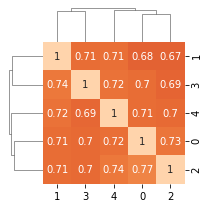

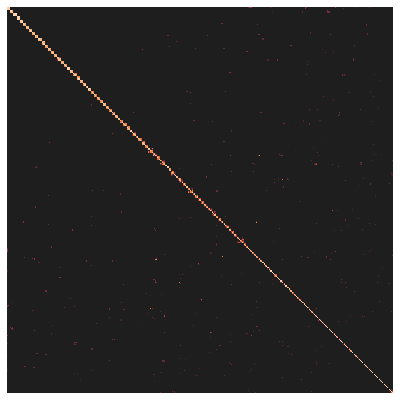

22 s for similarity matrix
	Running Louvain ...
		modularity: potts
	curve type: increasing


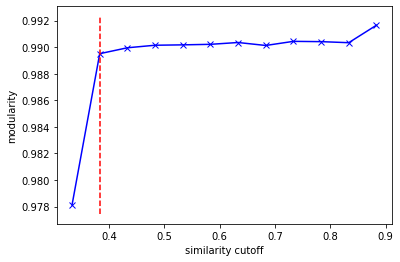

	Louvain runtime: modules detected in 0.52 s.
	modules: 129, not clustered features 83 
		similarity cutoff: 0.38 modularity: 0.990
all consensus biclusters: 218
detected 2+ times:123
3 s for making consensus biclusters from consensus gene sets


In [6]:
consensus_biclusters = make_consensus_biclusters2(biclusters, zscore(exprs), 
                                                      seed = cseed,
                                                      verbose = True,
                                                      plot = True)

In [7]:
# save consensus biclusters
outfile = out_dir+basename+".consensus_seed="+str(cseed)+".bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv"
write_bic_table(consensus_biclusters,outfile)
outfile

'tmp_results/TCGA200.consensus_seed=0.bin=kmeans,pval=0.01,clust=WGCNA,direction=DOWN-UP,ds=3,dch=0.995,max_power=10,precluster=True.biclusters.tsv'

# Example biclusters 

In [8]:
consensus_biclusters.head(10)

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
0,3.236828,211,36,"{FOXD1, LMAN1L, RASGEF1C, GABBR2, CALML5, STRA...","{TCGA-E2-A1II-01, TCGA-AN-A0FL-01, TCGA-GI-A2C...","{FOXD1, LMAN1L, RASGEF1C, GABBR2, CALML5, STRA...","{AGR2, GATA3, PRR15, FOXA1, SEMA3C, TMC5, SLC4...","{9729, 12290, 3077, 5647, 7695, 1553, 3602, 11...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,9
1,2.5962,2,12,"{RIPPLY2, NTSR2}","{TCGA-E2-A1II-01, TCGA-A1-A0SO-01, TCGA-A2-A0D...","{RIPPLY2, NTSR2}",{},"{8720, 10689}","{96, 33, 2, 162, 193, 165, 198, 7, 13, 21, 86,...",UP,2
2,2.462216,146,47,"{TMPRSS6, F7, IGFALS, SKAP1, MEIS3, SLC7A8, MY...","{TCGA-C8-A1HK-01, TCGA-E2-A1II-01, TCGA-A8-A0A...",{},"{TMPRSS6, IGFALS, F7, SKAP1, MEIS3, SLC7A8, MY...","{3596, 1529, 5647, 11795, 13331, 20, 4117, 719...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,6
3,2.241991,17,16,"{VCX, TUBA3C, VCX3A, MAGEC1, XAGE1B, PAGE2, OR...","{TCGA-BH-A0H7-01, TCGA-A8-A0A7-01, TCGA-AN-A0X...","{VCX, XAGE1B, TUBA3C, VCX3A, MAGEC1, PAGE2, OR...",{},"{13696, 9732, 12326, 8873, 649, 7342, 2895, 11...","{97, 66, 39, 105, 10, 187, 46, 142, 80, 113, 6...",UP,5
4,2.166532,15,19,"{MAGEA12, MAGEA2, MAGEB1, ZNF716, CSAG2, MAGEA...","{TCGA-A8-A0A7-01, TCGA-BH-A0HX-01, TCGA-B6-A0X...","{MAGEA12, MAGEA2, MAGEB1, GABRA3, ZNF716, CSAG...",{},"{3011, 3012, 7332, 7334, 7335, 7333, 7337, 426...","{2, 10, 12, 13, 142, 30, 36, 39, 46, 55, 187, ...",UP,5
5,2.142621,2,21,"{PRDM13, CALCB}","{TCGA-GI-A2C9-01, TCGA-AR-A0TS-01, TCGA-BH-A0A...","{PRDM13, CALCB}",{},"{1800, 9877}","{139, 12, 13, 143, 145, 19, 22, 157, 176, 189,...",UP,2
6,2.033547,6,17,"{CHGB, CARTPT, INSM1, VTN, GATA4, MUC2}","{TCGA-C8-A1HK-01, TCGA-A1-A0SQ-01, TCGA-E2-A15...","{CHGB, CARTPT, INSM1, VTN, GATA4, MUC2}",{},"{4978, 1875, 14133, 6201, 2491, 8060}","{0, 130, 3, 35, 162, 122, 134, 168, 77, 177, 1...",UP,7
7,2.013603,2,17,"{ODAM, PRR27}","{TCGA-E2-A1II-01, TCGA-A1-A0SO-01, TCGA-AR-A0U...","{ODAM, PRR27}",{},"{8819, 9996}","{2, 4, 165, 102, 166, 105, 139, 78, 79, 48, 19...",UP,2
8,1.98849,2,54,"{ZIC1, ZIC4}","{TCGA-AQ-A1H2-01, TCGA-AN-A0FL-01, TCGA-GI-A2C...","{ZIC1, ZIC4}",{},"{14540, 14543}","{1, 2, 131, 132, 5, 7, 136, 137, 139, 12, 13, ...",UP,2
9,1.970164,15,28,"{LHX2, ATP2B3, CALCA, USH1G, TLX3, IGSF23, SLC...","{TCGA-GI-A2C9-01, TCGA-AR-A0TS-01, TCGA-BH-A0A...","{LHX2, ATP2B3, CALCA, USH1G, TLX3, IGSF23, SLC...",{},"{13952, 6080, 12997, 4774, 1799, 4778, 8589, 5...","{131, 7, 139, 13, 142, 145, 19, 147, 157, 162,...",UP,5


In [9]:
g = "ERBB2"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
22,1.749853,15,20,"{NXPH1, STARD3, KRT24, DMRTC2, ERBB2, PGAP3, Z...","{TCGA-C8-A1HK-01, TCGA-A8-A0A7-01, TCGA-B6-A0I...","{NXPH1, STARD3, DMRTC2, KRT24, ERBB2, PGAP3, Z...",{},"{3552, 14946, 10075, 12099, 13254, 11338, 1287...","{129, 132, 134, 149, 28, 29, 39, 46, 47, 54, 6...",UP,5


In [10]:
g = "ESR1"
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
2,2.462216,146,47,"{TMPRSS6, F7, IGFALS, SKAP1, MEIS3, SLC7A8, MY...","{TCGA-C8-A1HK-01, TCGA-E2-A1II-01, TCGA-A8-A0A...",{},"{TMPRSS6, IGFALS, F7, SKAP1, MEIS3, SLC7A8, MY...","{3596, 1529, 5647, 11795, 13331, 20, 4117, 719...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,6


In [11]:
g = "FOXA1"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
0,3.236828,211,36,"{FOXD1, LMAN1L, RASGEF1C, GABBR2, CALML5, STRA...","{TCGA-E2-A1II-01, TCGA-AN-A0FL-01, TCGA-GI-A2C...","{FOXD1, LMAN1L, RASGEF1C, GABBR2, CALML5, STRA...","{AGR2, GATA3, PRR15, FOXA1, SEMA3C, TMC5, SLC4...","{9729, 12290, 3077, 5647, 7695, 1553, 3602, 11...","{128, 2, 131, 4, 7, 136, 139, 12, 13, 145, 19,...",BOTH,9
2,2.462216,146,47,"{TMPRSS6, F7, IGFALS, SKAP1, MEIS3, SLC7A8, MY...","{TCGA-C8-A1HK-01, TCGA-E2-A1II-01, TCGA-A8-A0A...",{},"{TMPRSS6, IGFALS, F7, SKAP1, MEIS3, SLC7A8, MY...","{3596, 1529, 5647, 11795, 13331, 20, 4117, 719...","{128, 2, 131, 4, 132, 134, 7, 135, 136, 139, 1...",DOWN,6


In [12]:
g = "SEZ6"
b= consensus_biclusters
b[b["genes"].apply(lambda x: g in x)]

,SNR,n_genes,n_samples,genes,samples,genes_up,genes_down,gene_indexes,sample_indexes,direction,detected_n_times
28,1.72422,10,10,"{LRTM2, CARTPT, PCSK2, KCNH6, LIN28A, SEZ6, CP...","{TCGA-C8-A1HK-01, TCGA-E2-A15S-01, TCGA-E2-A56...","{LRTM2, CARTPT, PCSK2, KCNH6, LIN28A, SEZ6, CP...",{},"{11392, 2913, 12579, 6442, 12523, 1875, 9140, ...","{33, 162, 134, 168, 17, 177, 178, 21, 122, 188}",UP,8


In [13]:
from utils.figs import draw_heatmap2,draw_heatmap
from utils.method import zscore

genes in  [4, 28, 22]   : 40


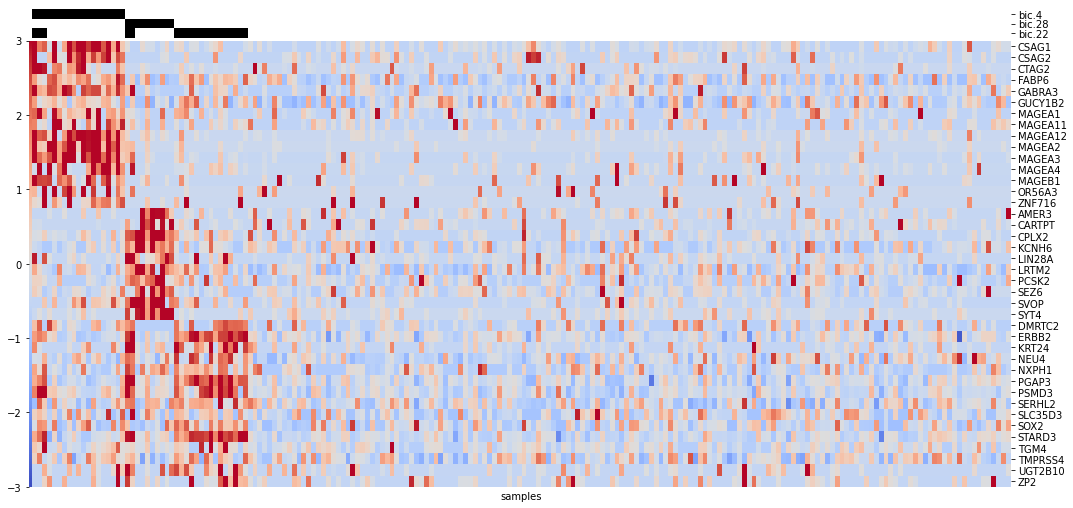

In [15]:
i = [4,28,22]
b = consensus_biclusters.loc[i,:]

show_genes = []
for j in b.index.values:
    show_genes += sorted(b.loc[j,"genes_down"])+sorted(b.loc[j,"genes_up"])
show_genes= sorted(set(show_genes))
print("genes in ",i,"  :",len(show_genes))
tmp = draw_heatmap2(zscore(exprs.loc[show_genes,:]),b,cluster_rows=False,
                    col_labels = False,row_labels = True,
                    figsize = (15,7),bic_prefix = "bic.")